In [1]:
!pip install phpserialize

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
/usr/local/lib/python2.7/dist-packages/pip/_vendor/urllib3/util/ssl_.py:354: SNIMissingWarning: An HTTPS request has been made, but the SNI (Server Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  SNIMissingWarning
/usr/local/lib/python2.7/dist-packages/pip/_vendor/urllib3/util/ssl_.py:150: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of

In [2]:
import pandas as pd
import phpserialize
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from scipy.interpolate import make_interp_spline, BSpline
import numpy as  np
import re
%matplotlib inline

In [3]:
group = "W"

In [4]:
data = pd.read_csv("diff_delivery_region.csv",sep=";", header = None, names=['date','order','fact_delivery','site_delivery','1c_delivery','basket'])

In [5]:
data['date'] =  pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')

In [6]:
c_delivery = data[data['1c_delivery'].notnull()]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74703 entries, 0 to 74702
Data columns (total 6 columns):
date             74703 non-null datetime64[ns]
order            74703 non-null int64
fact_delivery    74703 non-null float64
site_delivery    70607 non-null object
1c_delivery      14695 non-null object
basket           74703 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.4+ MB


In [8]:
data = data[pd.to_numeric(data['site_delivery'], errors='coerce').notnull()]
# data = data[pd.to_numeric(data['fact_delivery'], errors='coerce').notnull()]
c_delivery = c_delivery[pd.to_numeric(c_delivery['fact_delivery'], errors='coerce').notnull()]
c_delivery = c_delivery[pd.to_numeric(c_delivery['1c_delivery'], errors='coerce').notnull()]

In [9]:
data['site_delivery'] = data['site_delivery'].astype(float)

In [10]:
data['fact_delivery'] = data['fact_delivery'].astype(float)

In [11]:
c_delivery['fact_delivery'] = c_delivery['fact_delivery'].astype(float)
c_delivery['1c_delivery'] = c_delivery['1c_delivery'].astype(float)

In [12]:
c_delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14693 entries, 59 to 74698
Data columns (total 6 columns):
date             14693 non-null datetime64[ns]
order            14693 non-null int64
fact_delivery    14693 non-null float64
site_delivery    10653 non-null object
1c_delivery      14693 non-null float64
basket           14693 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 803.5+ KB


In [13]:
data['diff'] = data['site_delivery'] - data['fact_delivery']
c_delivery['diff'] = c_delivery['1c_delivery'] - c_delivery['fact_delivery']

In [14]:
data_group = data.drop(columns=['order'], axis=1).groupby(pd.Grouper(key='date', freq=group))

In [15]:
data_group_c = c_delivery.drop(columns=['order'], axis=1).groupby(pd.Grouper(key='date', freq=group))

In [16]:
result = data_group.mean()
result_c = data_group_c.mean()

In [17]:
result.head(5)

,fact_delivery,site_delivery,basket,diff
date,,,,
2016-06-05,634.269737,250.736842,129.254386,-383.532895
2016-06-12,624.500806,262.941667,0.000000,-361.559139
2016-06-19,645.462749,248.973262,49.441176,-396.489487
2016-06-26,648.954342,279.812500,0.000000,-369.141842
2016-07-03,689.315625,278.909091,9.062500,-410.406534


In [18]:
result_c.head(5)

,fact_delivery,1c_delivery,basket,diff
date,,,,
2016-06-05,700.490,0.0,0.0,-700.490
2016-06-12,882.000,0.0,0.0,-882.000
2016-06-19,642.895,119.5,0.0,-523.395
2016-06-26,583.930,300.0,0.0,-283.930
2016-07-03,639.365,148.0,0.0,-491.365


In [19]:
# xnew = np.linspace(result['cart_sum'].min(),result['cart_sum'].max(),300)

In [20]:
# spl = make_interp_spline(result['cart_sum'].values, result.index.values, k=5) #BSpline object

In [21]:
# power_smooth = spl(result.index.values)

<BarContainer object of 136 artists>

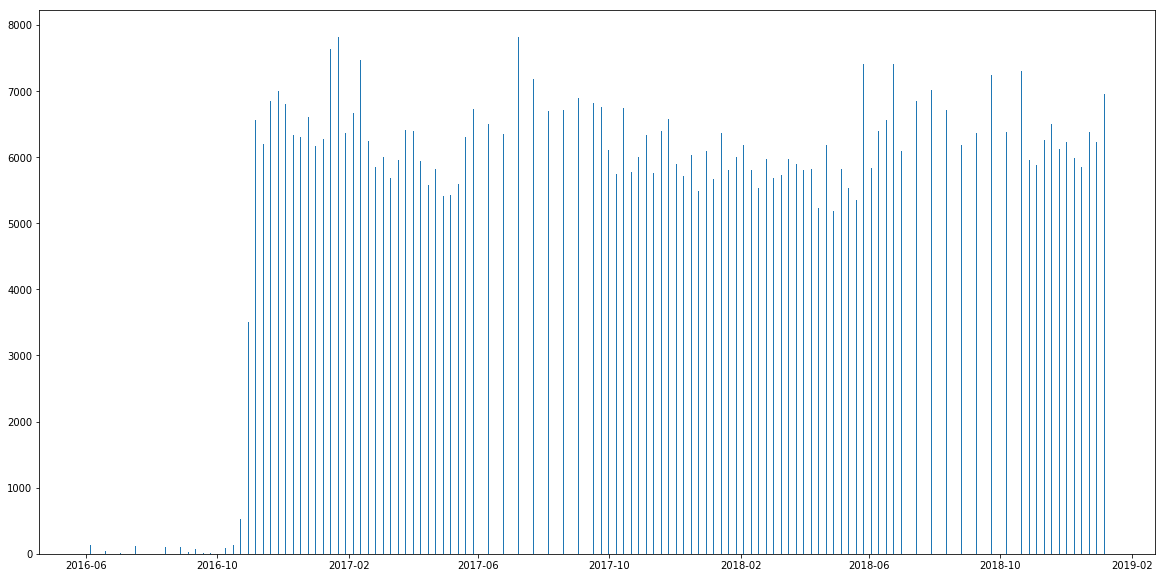

In [22]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.bar(result.index.values, result['basket'])

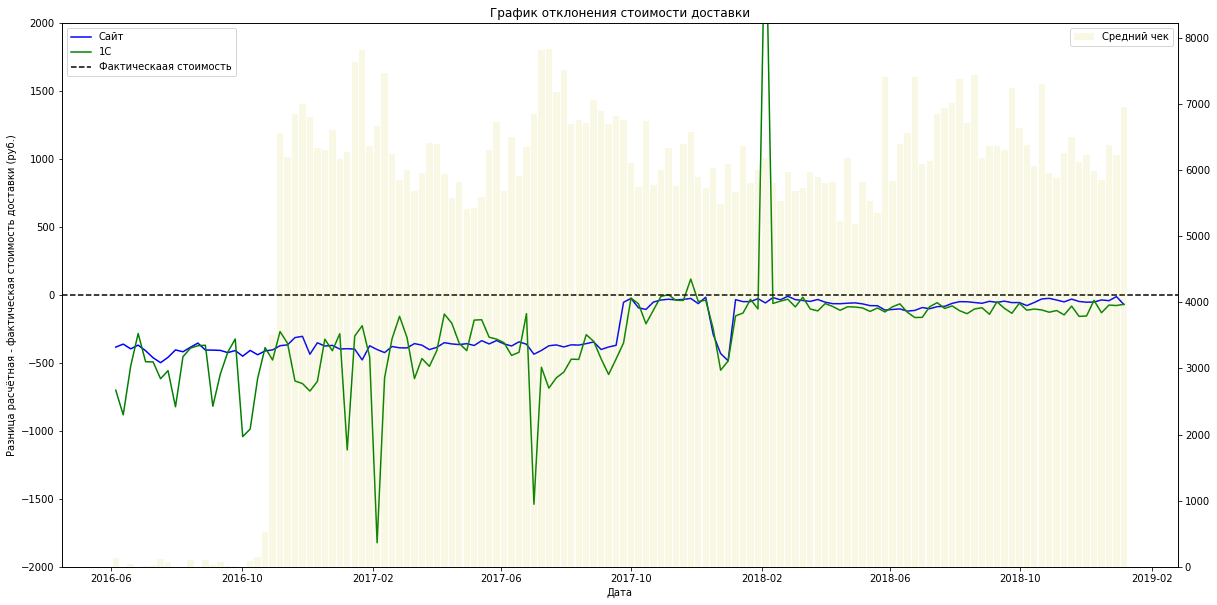

In [23]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.title(u"График отклонения стоимости доставки")
ax2 = ax1.twinx()
ax1.set_ylim([-2000,2000])
ax1.set_xlabel(u"Дата")
ax1.set_ylabel(u"Разница расчётная - фактическая стоимость доставки (руб.)")
ax1.plot(result['diff'],"-b", label=u'Сайт')
ax1.plot(result_c['diff'],"-g", label=u'1С')
ax2.bar(result.index.values, result['basket'], color="y", width=6, alpha=0.1, label=u"Средний чек")
ax1.axhline(0, color='k', linestyle='--', label=u"Фактическаая стоимость")
# ax1.plot(new_date_median['item_cost'],"-g", label=u'Стоиомсть позиции', antialiased=True)
# ax1.plot(new_date_mean['item_cost'],"-k", label=u'Стоиомсть позиции среднее', antialiased=True)
# ax1.plot(result['non_reg'],linewidth=2)
ax2.legend(loc=1)
ax1.legend(loc=2)

In [24]:
# fig, ax1 = plt.subplots(figsize=(20,10))
# ax2 = ax1.twinx()
# ax2.plot(result['user']/result['count'],linestyle='solid',linewidth=4)
# ax2.set_ylim([0,1])
# ax2.legend([u'Динамика заказов зарегистрированных пользователей'])